Найти в интернете любую выборку объёма не менее 100 наблюдений, если вы будете делать программу для её обработки, не менее 20 наблюдений, если вы будете считать вручную. Напоминаю, что выборка - это серия независимых наблюдений одного и того же показателя (например, плотности населения для всех стран мира). По этой выборке (желательно программно, а не ручками, можно, например, в экселе) вычислить выборочное среднее, выборочную дисперсию, выборочную квантиль (по заданному пользователем уровню квантили). 

# Русская популяция


In [9]:
import pandas as pd
import numpy as np

In [10]:

data = pd.read_csv('russia-population-2020-06-05.csv')

In [11]:
data

,date,Population,Annual Growth Rate
0,1950-12-31,102798657,NaN
1,1951-12-31,104304693,1.47
2,1952-12-31,105967080,1.59
3,1953-12-31,107727318,1.66
4,1954-12-31,109536494,1.68
5,1955-12-31,111355300,1.66
6,1956-12-31,113154334,1.62
7,1957-12-31,114913779,1.55
8,1958-12-31,116622407,1.49
9,1959-12-31,118275877,1.42


In [12]:
import scipy

In [13]:
from scipy import stats

In [14]:
import seaborn as sns
from seaborn import distplot

In [15]:
data.dtypes

date                    object
 Population              int64
 Annual Growth Rate    float64
dtype: object

In [16]:
data.date = data.date.apply(pd.to_datetime)

In [17]:
data.dtypes

date                   datetime64[ns]
 Population                     int64
 Annual Growth Rate           float64
dtype: object

In [18]:
stats.anderson(data[' Population'], dist = 'expon')

AndersonResult(statistic=27.112150471182957, critical_values=array([0.914, 1.069, 1.33 , 1.593, 1.941]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [19]:
data[' Population']

0     102798657
1     104304693
2     105967080
3     107727318
4     109536494
5     111355300
6     113154334
7     114913779
8     116622407
9     118275877
10    119871700
11    121403892
12    122858227
13    124210252
14    125430993
15    126503736
16    127417190
17    128187396
18    128859798
19    129497501
20    130148653
21    130830719
22    131539634
23    132275731
24    133032262
25    133804858
26    134596232
27    135413334
28    136259824
29    137139388
        ...    
41    147995593
42    148268581
43    148373580
44    148349441
45    148227466
46    148020847
47    147730019
48    147360604
49    146915915
50    146404903
51    145830721
52    145215700
53    144610882
54    144080643
55    143672116
56    143403256
57    143266212
58    143248764
59    143326913
60    143479274
61    143703025
62    143993892
63    144325449
64    144664841
65    144985057
66    145275383
67    145530082
68    145734038
69    145872256
70    145934462
Name:  Population, Lengt

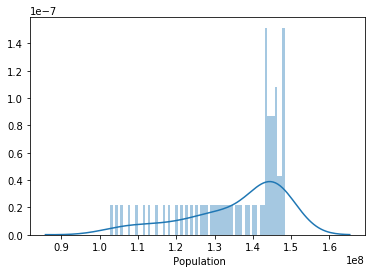

In [20]:
ax = sns.distplot(data[' Population'], bins = 70, kde = 'True')

# Выборочное среднее

In [24]:
scipy.stats.tmean(data[' Population'])

135690247.35211268

# Выборочная дисперсия

In [27]:
scipy.stats.tvar(data[' Population'])

165422575580974.2

# Квантиль

In [1]:
np.quantile(data[' Population'], .60)

NameError: name 'np' is not defined